We will first illustrate SVM first with an artificial dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# using an artificial dataset (linearly separable)
np.random.seed(42)  # For reproducibility

# Generate two closer clusters (but still separable)
n_samples = 40  # 20 per class
X_class1 = np.random.randn(n_samples//2, 2) * 0.2 + [0.1, 0.1]  # Cluster 1 centered at (-1, -1)
X_class2 = np.random.randn(n_samples//2, 2) * 0.5 + [1, 1]    # Cluster 2 centered at (1, 1)
X = np.vstack([X_class1, X_class2])
y = np.hstack([np.zeros(n_samples//2), np.ones(n_samples//2)])

# Plot the toy dataset
plt.figure(figsize=(6, 4))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='x', s=100, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='green', marker='o', s=100, label='Class 1')
plt.title('Dataset', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('toy_dataset_closer.png', dpi=300)
plt.show()

# Train a hard-margin SVM (very high C value)
svm = SVC(kernel='linear', C=1000.0)
svm.fit(X, y)

# Get the decision boundary parameters
w = svm.coef_[0]
b = svm.intercept_[0]  # This is a scalar
margin_width = 1 / np.sqrt(np.sum(w**2))

# Print SVM parameters
print(f"Decision Boundary: {w[0]:.4f}*x1 + {w[1]:.4f}*x2 + {b:.4f} = 0")
print(f"Margin Width: {margin_width:.4f}")
print(f"Number of Support Vectors: {len(svm.support_vectors_)}")
print(f"Support Vector Indices: {svm.support_}")

# Plot the SVM decision boundary and margins
plt.figure(figsize=(6, 4))

# Plot the data points
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='x', s=100, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='green', marker='o', s=100, label='Class 1')

# plot limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Create a meshgrid
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Calculate decision function values for each point in the grid
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create contour for decision boundary (Z=0) and margins (Z=-1 and Z=1)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'], linewidths=[2, 2, 2])

plt.contourf(xx, yy, Z, colors=['none', 'lightblue', 'none'], 
             levels=[-1, 1], alpha=0.3)

# Highlight support vectors with blue circles
plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], 
            s=200, facecolors='none', edgecolors='blue', linewidths=2, 
            label='Support Vectors')

# Label some key elements
w_norm = np.sqrt(np.sum(w**2))
margin_text_point = (0, -2)
plt.annotate(f"Margin Width = {margin_width:.4f}", 
            xy=margin_text_point, xytext=margin_text_point,
            fontsize=12, bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.7))

# Fill decision regions
plt.contourf(xx, yy, Z, colors=['tomato', 'lightgreen'], 
             levels=[-1000, 0, 1000], alpha=0.2)

# Add arrows to show the direction of the separating hyperplane normal vector
mid_point = np.array([0, -b/w[1]])  # A point on the decision boundary
normal_direction = w / w_norm
arrow_length = 0.5
plt.arrow(mid_point[0], mid_point[1], 
          arrow_length * normal_direction[0], arrow_length * normal_direction[1],
          head_width=0.1, head_length=0.1, fc='blue', ec='blue', label='Normal Vector')

plt.title('Hard-Margin SVM', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=12)


plt.tight_layout()
plt.savefig('hard_margin_svm_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Now compare with a soft-margin SVM
soft_svm = SVC(kernel='linear', C=0.5)  # Lower C for softer margins
soft_svm.fit(X, y)

# Get soft SVM parameters
w_soft = soft_svm.coef_[0]
b_soft = soft_svm.intercept_[0]
margin_width_soft = 1 / np.sqrt(np.sum(w_soft**2))

print("\nSoft-Margin SVM (C=0.5):")
print(f"Margin Width: {margin_width_soft:.4f}")
print(f"Number of Support Vectors: {len(soft_svm.support_vectors_)}")

# Plot the soft-margin SVM for comparison
plt.figure(figsize=(6, 4))

# Plot the data points
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='x', s=100, label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='green', marker='o', s=100, label='Class 1')

# Calculate decision function values for soft SVM
Z_soft = soft_svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_soft = Z_soft.reshape(xx.shape)

# Plot decision boundary and margins
plt.contour(xx, yy, Z_soft, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'], linewidths=[2, 2, 2])

# Fill the margin area with light purple
plt.contourf(xx, yy, Z_soft, colors=['none', 'lavender', 'none'], 
             levels=[-1, 1], alpha=0.5)

# Fill decision regions
plt.contourf(xx, yy, Z_soft, colors=['tomato', 'lightgreen'], 
             levels=[-1000, 0, 1000], alpha=0.2)

# Highlight support vectors
plt.scatter(soft_svm.support_vectors_[:, 0], soft_svm.support_vectors_[:, 1], 
            s=200, facecolors='none', edgecolors='purple', linewidths=2, 
            label='Support Vectors')

plt.title('Soft-Margin SVM (C=0.5)', fontsize=16)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(fontsize=12)

# Add annotation about margin width
margin_text_point = (0, -2)
plt.annotate(f"Margin Width = {margin_width_soft:.4f}", 
            xy=margin_text_point, xytext=margin_text_point,
            fontsize=12, bbox=dict(boxstyle="round,pad=0.2", fc="yellow", alpha=0.7))

plt.tight_layout()
plt.savefig('soft_margin_svm_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# we create test data
n_test=100
# Generate test dataset (similar pattern but different random sample)
np.random.seed(123)  # Different seed for test data
X_test_class1 = np.random.randn(n_test//2, 2) * 0.2 + [0.1, 0.1]  # Cluster 1 centered at (-1, -1)
X_test_class2 = np.random.randn(n_test//2, 2) * 0.5 + [1, 1]    # Cluster 2 centered at (1, 1)

X_test = np.vstack([X_test_class1, X_test_class2])
y_test = np.hstack([np.zeros(n_test//2), np.ones(n_test//2)])

# Add code after comparing both models

# Evaluate accuracy for different C values
C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
train_accuracy = []
test_accuracy = []
margin_widths = []
support_vector_counts = []

for C in C_values:
    # Train model with current C
    model = SVC(kernel='linear', C=C)
    model.fit(X, y)
    
    # Calculate margin width
    w = model.coef_[0]
    margin_width = 1 / np.sqrt(np.sum(w**2))
    
    # Get accuracies
    train_acc = model.score(X, y)
    test_acc = model.score(X_test, y_test)
    
    # Store results
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)
    margin_widths.append(margin_width)
    support_vector_counts.append(len(model.support_vectors_))
    
    print(f"C={C:.3f}: Train Acc={train_acc:.4f}, Test Acc={test_acc:.4f}, "
          f"Margin Width={margin_width:.4f}, SVs={len(model.support_vectors_)}")

# Plot the results
plt.figure(figsize=(12, 10))

# Create 2x2 subplots
plt.subplot(2, 2, 1)
plt.semilogx(C_values, train_accuracy, 'b-o', label='Training Accuracy')
plt.semilogx(C_values, test_accuracy, 'r-s', label='Test Accuracy')
plt.xlabel('C (regularization parameter)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs. C Parameter', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 2, 2)
plt.semilogx(C_values, margin_widths, 'g-^', label='Margin Width')
plt.xlabel('C (regularization parameter)', fontsize=12)
plt.ylabel('Margin Width', fontsize=12)
plt.title('Margin Width vs. C Parameter', fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.semilogx(C_values, support_vector_counts, 'm-d', label='Number of SVs')
plt.xlabel('C (regularization parameter)', fontsize=12)
plt.ylabel('Number of Support Vectors', fontsize=12)
plt.title('Support Vectors vs. C Parameter', fontsize=14)
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(margin_widths, test_accuracy, 'ko-')
plt.xlabel('Margin Width', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Test Accuracy vs. Margin Width', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('svm_regularization_analysis.png', dpi=300)
plt.show()

# Find the best C value
best_C_index = np.argmax(test_accuracy)
best_C = C_values[best_C_index]
print(f"\nBest C value: {best_C} with test accuracy: {test_accuracy[best_C_index]:.4f}")
print(f"Margin width for best C: {margin_widths[best_C_index]:.4f}")
print(f"Support vectors for best C: {support_vector_counts[best_C_index]}")


Now we will show how SVM works with our "students grades" dataset, which is rather noisy and not well separable.

First we load the data and augment it, and plot the dataset without any modeling.


Augmented dataset:
    Quizzes      Labs     Final
0  5.399343  5.272347  4.947538
0  5.604606  5.253169  4.771173
0  5.615843  5.453487  4.724105
0  5.408512  5.207316  4.724854
0  5.348392  4.917344  4.473016
Shape: (160, 3)


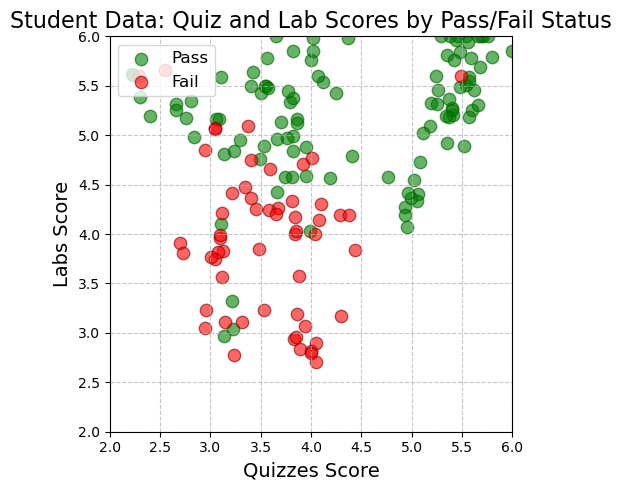

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the dataset
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}
# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for j in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise
        new_row = row + noise
        new_row = new_row.clip(2, 6)  # Ensure values are within boundaries
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)
print("\nAugmented dataset:")
print(df_aug.head())
print(f"Shape: {df_aug.shape}")

# Create binary classification (Pass/Fail) 
# passing grade > 4.0 
def pass_fail(grade):
    return 1 if grade >= 4.0 else 0  # 1 = Pass, 0 = Fail

# Add binary grades
df_aug['Pass'] = df_aug['Final'].apply(pass_fail)

# Original visualization
plt.figure(figsize=(5, 5))
# Plot pass/fail
pass_points = df_aug[df_aug['Pass'] == 1]
fail_points = df_aug[df_aug['Pass'] == 0]
plt.scatter(pass_points['Quizzes'], pass_points['Labs'], 
            color='green', label='Pass', alpha=0.6, s=80, edgecolor='darkgreen')
plt.scatter(fail_points['Quizzes'], fail_points['Labs'], 
            color='red', label='Fail', alpha=0.6, s=80, edgecolor='darkred')
plt.title('Student Data: Quiz and Lab Scores by Pass/Fail Status', fontsize=16)
plt.xlabel('Quizzes Score', fontsize=14)
plt.ylabel('Labs Score', fontsize=14)
plt.xlim([2, 6])
plt.ylim([2, 6])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()



Notice that already in the raw data plot it is clear that this dataset is not linearly separable. Even when there are support vector inside the margin, there are points from the opposite class very far from the margin.

Now we will implement the soft margin SVM (classification) model. We calculate the decision boundary using the cost function for maximizing the margin along with the regularization term that allows for misclassifications. Even when the value of C is very large, there will be  misclassifications. In the code, this corresponds to C=10000.
```
  # Train SVM model
svm = SVC(kernel='linear', C=10000)
svm.fit(X_train_scaled, y_train)
```


In [2]:
# SVM Implementation
# Extract features and target
X = df_aug[['Quizzes', 'Labs']].values
y = df_aug['Pass'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm = SVC(kernel='linear', C=10000)
svm.fit(X_train_scaled, y_train)

# Get predictions
y_pred = svm.predict(X_test_scaled)

# Print model evaluation
print("\nSVM Model Evaluation:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


SVM Model Evaluation:

Confusion Matrix:
[[ 4  4]
 [ 1 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.85      0.96      0.90        24

    accuracy                           0.84        32
   macro avg       0.83      0.73      0.76        32
weighted avg       0.84      0.84      0.83        32

Accuracy: 0.8438


This gets us to an accuracy of 0.84. Now we will visualize the separating hyperplane (line) and the corresponding margins, along with the support vectors. Note how the margin width is calculated (which is 1/||w||): 
```
  margin_distance = 1 / np.sqrt(np.sum(w**2))
```

The plot will also show the support vectors.



SVM Decision Boundary: Labs = -0.4071 * Quizzes + -0.3771
Margin width: 0.4294
SVM Cost Function Value: 450770.4797


/var/folders/zc/7515kqlj3r90350hdc7p7yqw0000gq/T/ipykernel_68138/2765802527.py:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors='blue', levels=[0.5], linestyles='-', linewidths=2,


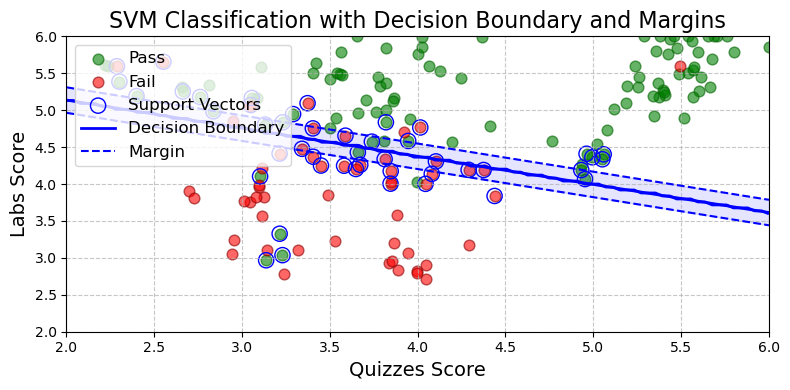

Number of support vectors: 46
Margin width in original feature space: 0.1725


In [3]:
# Get decision boundary parameters
w = svm.coef_[0]
b = svm.intercept_[0]
slope = -w[0] / w[1]
intercept = -b / w[1]

print(f"\nSVM Decision Boundary: Labs = {slope:.4f} * Quizzes + {intercept:.4f}")

# Calculate margin
margin_distance = 1 / np.sqrt(np.sum(w**2))
print(f"Margin width: {margin_distance:.4f}")

# Calculate cost function
def hinge_loss(X, y, w, b, C):
    # Regularization term
    margin_term = 0.5 * np.sum(w**2)
    
    # Hinge loss term
    decision_function = np.dot(X, w) + b
    # Convert y to -1/1 format
    y_svm = 2*y - 1  # Convert 0/1 to -1/1
    hinge = np.maximum(0, 1 - y_svm * decision_function)
    loss_term = C * np.sum(hinge)
    
    return margin_term + loss_term

# Calculate cost for the SVM without slack variables
y_svm_format = 2*y_train - 1  # Convert 0/1 to -1/1
cost = hinge_loss(X_train_scaled, y_train, w, b, C=10000)
print(f"SVM Cost Function Value: {cost:.4f}")



# Visualize SVM Decision Boundary with Margins
plt.figure(figsize=(8, 4))

# Get pass and fail points for plotting
pass_points = df_aug[df_aug['Pass'] == 1]
fail_points = df_aug[df_aug['Pass'] == 0]

# Plot points
plt.scatter(pass_points['Quizzes'], pass_points['Labs'], 
            color='green', label='Pass', alpha=0.6, s=60, edgecolor='darkgreen')
plt.scatter(fail_points['Quizzes'], fail_points['Labs'], 
            color='red', label='Fail', alpha=0.6, s=60, edgecolor='darkred')

# grod for the plot of the decision boundary
x_min, x_max = 2, 6
y_min, y_max = 2, 6
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_scaled = scaler.transform(grid_points)

# predictions for grid points
Z = svm.predict(grid_points_scaled)
Z = Z.reshape(xx.shape)

# decision boundary
plt.contour(xx, yy, Z, colors='blue', levels=[0.5], linestyles='-', linewidths=2, 
            label='Decision Boundary')

# support vectors
support_vectors = scaler.inverse_transform(svm.support_vectors_)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=120, 
            linewidth=1, facecolors='none', edgecolors='blue', label='Support Vectors')

# margins
# normal vector in original space
w_original = w / scaler.scale_
b_original = b - np.sum(w_original * scaler.mean_)

# margins in original space
margin_dist_original = margin_distance / np.linalg.norm(w_original)

# Function to get y coordinate on decision boundary for a given x
def get_decision_boundary_y(x):
    return (-w_original[0] * x - b_original) / w_original[1]

# Function to get y coordinate on margin boundaries for a given x
def get_margin_y(x, offset):
    return (-w_original[0] * x - b_original + offset) / w_original[1]

# Create x values for plotting lines
x_vals = np.linspace(x_min, x_max, 100)

# Calculate y values for decision boundary
y_boundary = [get_decision_boundary_y(x) for x in x_vals]

# Calculate y values for margin boundaries
margin_offset = 1 / np.linalg.norm(w_original)  # In original feature space
y_upper_margin = [get_margin_y(x, margin_offset) for x in x_vals]
y_lower_margin = [get_margin_y(x, -margin_offset) for x in x_vals]

# Plot the decision boundary
plt.plot(x_vals, y_boundary, 'b-', linewidth=2, label='Decision Boundary')

# Plot the margin boundaries
plt.plot(x_vals, y_upper_margin, 'b--', linewidth=1.5, label='Margin')
plt.plot(x_vals, y_lower_margin, 'b--', linewidth=1.5)

# Fill the margin area with light blue
plt.fill_between(x_vals, y_lower_margin, y_upper_margin, color='blue', alpha=0.1)

# Setting plot limits and labels
plt.xlim([x_min, x_max])
plt.ylim([y_min, y_max])
plt.title('SVM Classification with Decision Boundary and Margins', fontsize=16)
plt.xlabel('Quizzes Score', fontsize=14)
plt.ylabel('Labs Score', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.savefig('svm_with_margins.png', dpi=300, bbox_inches='tight')
plt.show()

# Print info about margins and support vectors
print(f"Number of support vectors: {len(support_vectors)}")
print(f"Margin width in original feature space: {margin_dist_original:.4f}")


Augmented dataset:
    Quizzes      Labs     Final
0  5.399343  5.272347  4.947538
0  5.604606  5.253169  4.771173
0  5.615843  5.453487  4.724105
0  5.408512  5.207316  4.724854
0  5.348392  4.917344  4.473016
Shape: (160, 3)


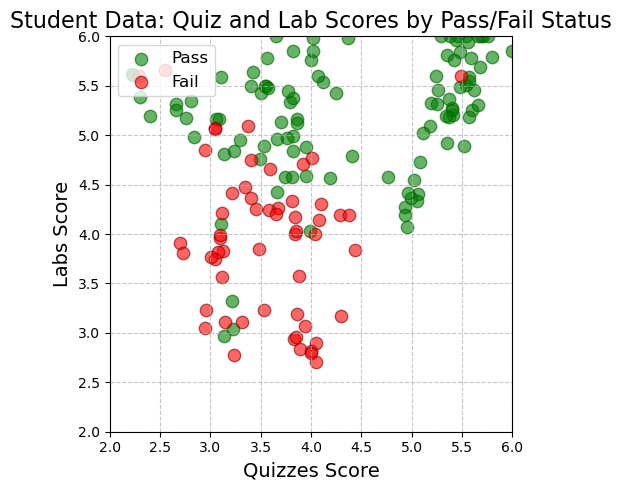

C = 0.0001: Train Acc = 0.6161, Test Acc = 0.7292, Margin Width = 207.6568, Support Vectors = 86
C = 0.0010: Train Acc = 0.6161, Test Acc = 0.7292, Margin Width = 20.8003, Support Vectors = 86
C = 0.0100: Train Acc = 0.7589, Test Acc = 0.8333, Margin Width = 2.0801, Support Vectors = 86
C = 0.1000: Train Acc = 0.8750, Test Acc = 0.8750, Margin Width = 0.8810, Support Vectors = 58
C = 1.0000: Train Acc = 0.8750, Test Acc = 0.8750, Margin Width = 0.5929, Support Vectors = 45
C = 10.0000: Train Acc = 0.9107, Test Acc = 0.8542, Margin Width = 0.4639, Support Vectors = 42
C = 100.0000: Train Acc = 0.9107, Test Acc = 0.8542, Margin Width = 0.4635, Support Vectors = 42
C = 1000.0000: Train Acc = 0.9107, Test Acc = 0.8542, Margin Width = 0.4637, Support Vectors = 42


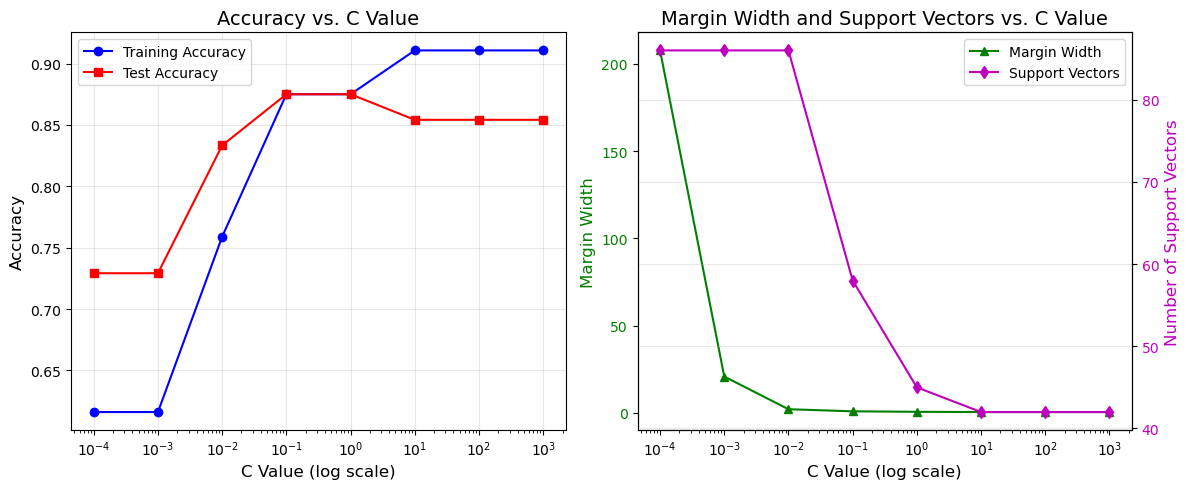

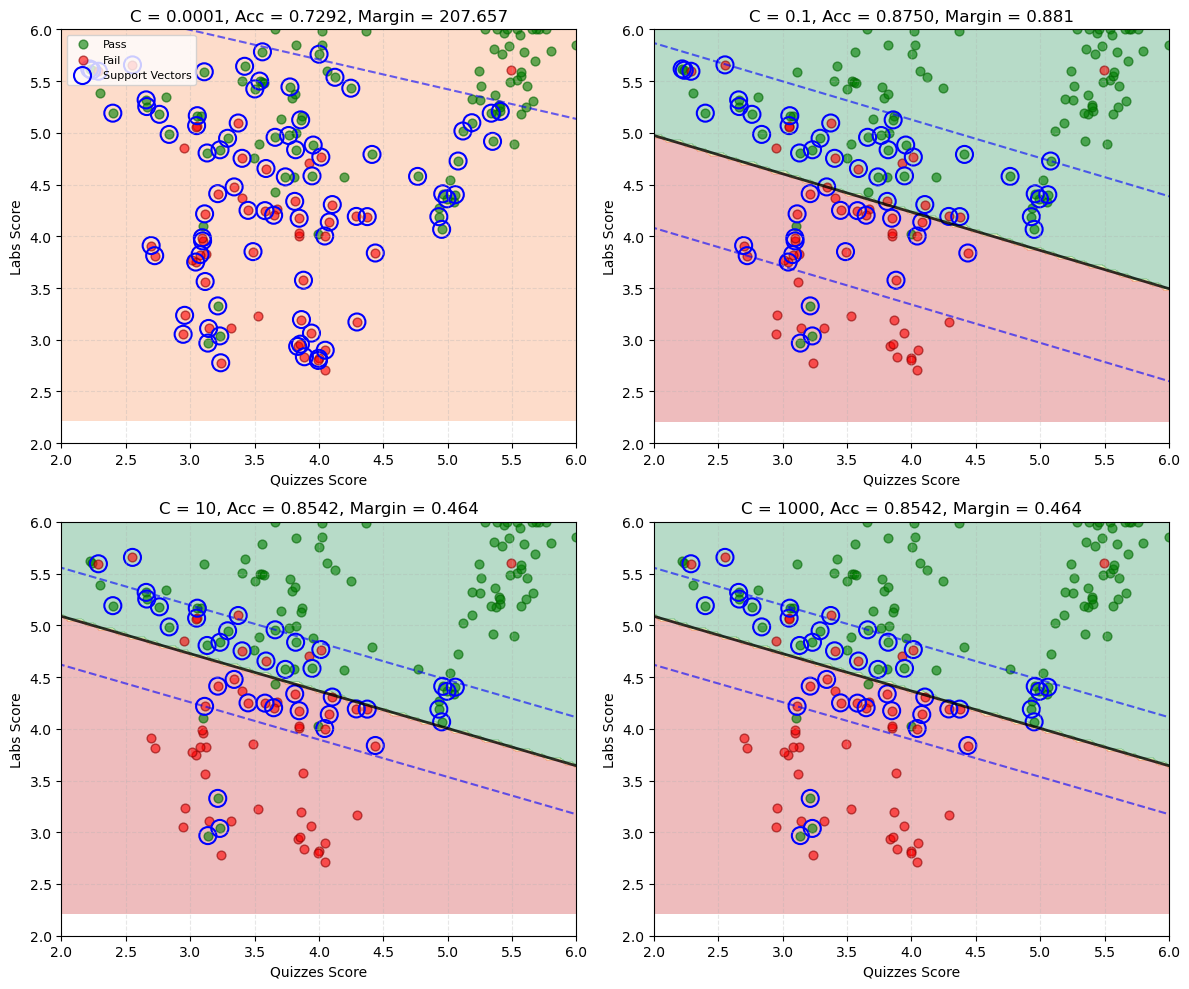


Best C value: 0.1 with test accuracy: 0.8750
Margin width for best C: 0.8810
Number of support vectors for best C: 58


In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the dataset
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}
# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(42)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for j in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise
        new_row = row + noise
        new_row = new_row.clip(2, 6)  # Ensure values are within boundaries
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)
print("\nAugmented dataset:")
print(df_aug.head())
print(f"Shape: {df_aug.shape}")

# Create binary classification (Pass/Fail) 
# passing grade > 4.0 
def pass_fail(grade):
    return 1 if grade >= 4.0 else 0  # 1 = Pass, 0 = Fail

# Add binary grades
df_aug['Pass'] = df_aug['Final'].apply(pass_fail)

# Original visualization
plt.figure(figsize=(5, 5))
# Plot pass/fail
pass_points = df_aug[df_aug['Pass'] == 1]
fail_points = df_aug[df_aug['Pass'] == 0]
plt.scatter(pass_points['Quizzes'], pass_points['Labs'], 
            color='green', label='Pass', alpha=0.6, s=80, edgecolor='darkgreen')
plt.scatter(fail_points['Quizzes'], fail_points['Labs'], 
            color='red', label='Fail', alpha=0.6, s=80, edgecolor='darkred')
plt.title('Student Data: Quiz and Lab Scores by Pass/Fail Status', fontsize=16)
plt.xlabel('Quizzes Score', fontsize=14)
plt.ylabel('Labs Score', fontsize=14)
plt.xlim([2, 6])
plt.ylim([2, 6])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

# Extract features and target for modeling
X = df_aug[['Quizzes', 'Labs']].values
y = df_aug['Pass'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of C values to test (including 0 as requested)
# Note: C=0 is not valid in sklearn, so we'll use a very small value instead
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Initialize lists to store results
train_accuracies = []
test_accuracies = []
margin_widths = []
num_support_vectors = []

# Evaluate each C value
for C in C_values:
    # Train SVM model
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_scaled, y_train)
    
    # Calculate margin width
    w = svm.coef_[0]
    margin_width = 1 / np.sqrt(np.sum(w**2))
    
    # Get predictions
    y_train_pred = svm.predict(X_train_scaled)
    y_test_pred = svm.predict(X_test_scaled)
    
    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    # Store results
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    margin_widths.append(margin_width)
    num_support_vectors.append(len(svm.support_vectors_))
    
    print(f"C = {C:.4f}: Train Acc = {train_acc:.4f}, Test Acc = {test_acc:.4f}, "
          f"Margin Width = {margin_width:.4f}, Support Vectors = {len(svm.support_vectors_)}")

# Create a plot of C vs. accuracy
plt.figure(figsize=(12, 5))

# Plot 1: Accuracy vs C value
plt.subplot(1, 2, 1)
plt.semilogx(C_values, train_accuracies, 'b-o', label='Training Accuracy')
plt.semilogx(C_values, test_accuracies, 'r-s', label='Test Accuracy')
plt.xlabel('C Value (log scale)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy vs. C Value', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Margin Width and Support Vectors vs C value
plt.subplot(1, 2, 2)
ax1 = plt.gca()
ax1.semilogx(C_values, margin_widths, 'g-^', label='Margin Width')
ax1.set_xlabel('C Value (log scale)', fontsize=12)
ax1.set_ylabel('Margin Width', fontsize=12, color='g')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()
ax2.semilogx(C_values, num_support_vectors, 'm-d', label='Support Vectors')
ax2.set_ylabel('Number of Support Vectors', fontsize=12, color='m')
ax2.tick_params(axis='y', labelcolor='m')

plt.title('Margin Width and Support Vectors vs. C Value', fontsize=14)
plt.grid(True, alpha=0.3)

# Add combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')

plt.tight_layout()
plt.savefig('svm_c_vs_accuracy.png', dpi=300)
plt.show()

# Visualize decision boundaries for selected C values
# Choose a few representative C values
selected_C = [0.0001, 0.1, 10, 1000]
plt.figure(figsize=(12, 10))

for i, C in enumerate(selected_C):
    plt.subplot(2, 2, i+1)
    
    # Train model with current C
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_scaled, y_train)
    
    # Get decision boundary parameters
    w = svm.coef_[0]
    b = svm.intercept_[0]
    margin_width = 1 / np.sqrt(np.sum(w**2))
    
    # Create a meshgrid for visualization
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Scale the meshgrid points
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_scaled = scaler.transform(grid_points)
    
    # Get predictions for grid points
    Z = svm.predict(grid_points_scaled)
    Z = Z.reshape(xx.shape)
    
    # Calculate decision function for margin boundaries
    Z_func = svm.decision_function(grid_points_scaled)
    Z_func = Z_func.reshape(xx.shape)
    
    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlGn)
    
    # Plot decision boundary and margins
    plt.contour(xx, yy, Z_func, colors='k', levels=[0], alpha=0.8, linestyles=['-'], linewidths=[2])
    plt.contour(xx, yy, Z_func, colors='blue', levels=[-1, 1], alpha=0.6, linestyles=['--'], linewidths=[1.5])
    
    # Plot the data points
    plt.scatter(pass_points['Quizzes'], pass_points['Labs'], 
                color='green', label='Pass', alpha=0.6, s=40, edgecolor='darkgreen')
    plt.scatter(fail_points['Quizzes'], fail_points['Labs'], 
                color='red', label='Fail', alpha=0.6, s=40, edgecolor='darkred')
    
    # Highlight support vectors
    support_vectors = scaler.inverse_transform(svm.support_vectors_)
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
                s=150, facecolors='none', edgecolors='blue', linewidths=1.5,
                label='Support Vectors')
    
    # Add information about the model
    test_acc = accuracy_score(y_test, svm.predict(X_test_scaled))
    plt.title(f'C = {C}, Acc = {test_acc:.4f}, Margin = {margin_width:.3f}', fontsize=12)
    plt.xlabel('Quizzes Score', fontsize=10)
    plt.ylabel('Labs Score', fontsize=10)
    
    if i == 0:
        plt.legend(loc='upper left', fontsize=8)
    
    plt.xlim([2, 6])
    plt.ylim([2, 6])
    plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('svm_decision_boundaries.png', dpi=300)
plt.show()

# Find optimal C value
best_C_index = np.argmax(test_accuracies)
best_C = C_values[best_C_index]
print(f"\nBest C value: {best_C} with test accuracy: {test_accuracies[best_C_index]:.4f}")
print(f"Margin width for best C: {margin_widths[best_C_index]:.4f}")
print(f"Number of support vectors for best C: {num_support_vectors[best_C_index]}")

Now we go to nonlinear (kernel) SVM. We will illustrate how a kernel works. First we create the data.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import time

# dataset that is not linearly separable (circular)
np.random.seed(42)
n_samples = 100


radius = 0.5
theta = np.random.uniform(0, 2*np.pi, n_samples)
r = np.random.uniform(0, 1, n_samples)

# Class 1: points inside the circle, Class 0: points outside
X = np.zeros((n_samples, 2))
X[:, 0] = r * np.cos(theta)
X[:, 1] = r * np.sin(theta)
y = (r < radius).astype(int)

Now we will demonstrate SVM for non linearly separable data. We will use a circular dataset. 

We first run standard SVM, which fails to classify around 1/3 of the data correctly. Then, we do a "manual" mapping using the features from the slides presented in the lecture. So each data point x=(x₁,x₂) is transformed according to the follwing:

```
  φ(x₁, x₂) = (x₁², x₂², √2x₁x₂)

```

Then we run SVM with the transformed data.

And we compare to a custom implementaiton of a kernel based on this mapping.

```
# Custom kernel function for this mapping
def custom_kernel(X1, X2):
    """Kernel corresponding to φ(x₁, x₂) = (x₁², x₂², √2x₁x₂)"""
    result = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x in enumerate(X1):
        for j, y in enumerate(X2):
            # K(x,y) = x₁²·y₁² + x₂²·y₂² + 2·x₁·x₂·y₁·y₂
            result[i, j] = x[0]**2 * y[0]**2 + x[1]**2 * y[1]**2 + 2 * x[0] * x[1] * y[0] * y[1]
    return result

```
Note that here, x and y are two data points (vectors). The calculation of the kernel is run pairwise for each two data points in the dataset.

Finally, we run SVM with two more built-in kernels: polynomial kernel, and radial basis function (RBF) kernel. The RBF kernel is most versatile and achieves best accuracy (at least on the training dataset).





Model accuracy comparison:
Linear SVM on original data accuracy: 0.6800 (Training time: 0.0013s)
Linear SVM on explicitly mapped data accuracy: 0.9000 (Training time: 0.0007s)
SVM with polynomial kernel accuracy: 0.9000 (Training time: 0.0004s)
SVM with custom kernel accuracy: 0.9000 (Training time: 0.0088s)
SVM with RBF kernel accuracy: 0.9800 (Training time: 0.0005s)

Verifying kernel equivalence...
Direct calculation in mapped space:
[[6.69700114e-06 3.14152899e-05 2.36670735e-06]
 [3.74843364e-02 2.56256444e-02 1.93549301e-03]
 [1.14433986e-02 6.42139624e-02 4.84419881e-03]]

Using correct kernel function:
[[6.69700114e-06 3.14152899e-05 2.36670735e-06]
 [3.74843364e-02 2.56256444e-02 1.93549301e-03]
 [1.14433986e-02 6.42139624e-02 4.84419881e-03]]

Difference (should be very small):
[[1.69406589e-21 4.06575815e-20 1.27054942e-21]
 [0.00000000e+00 3.46944695e-18 4.33680869e-19]
 [0.00000000e+00 0.00000000e+00 8.67361738e-19]]


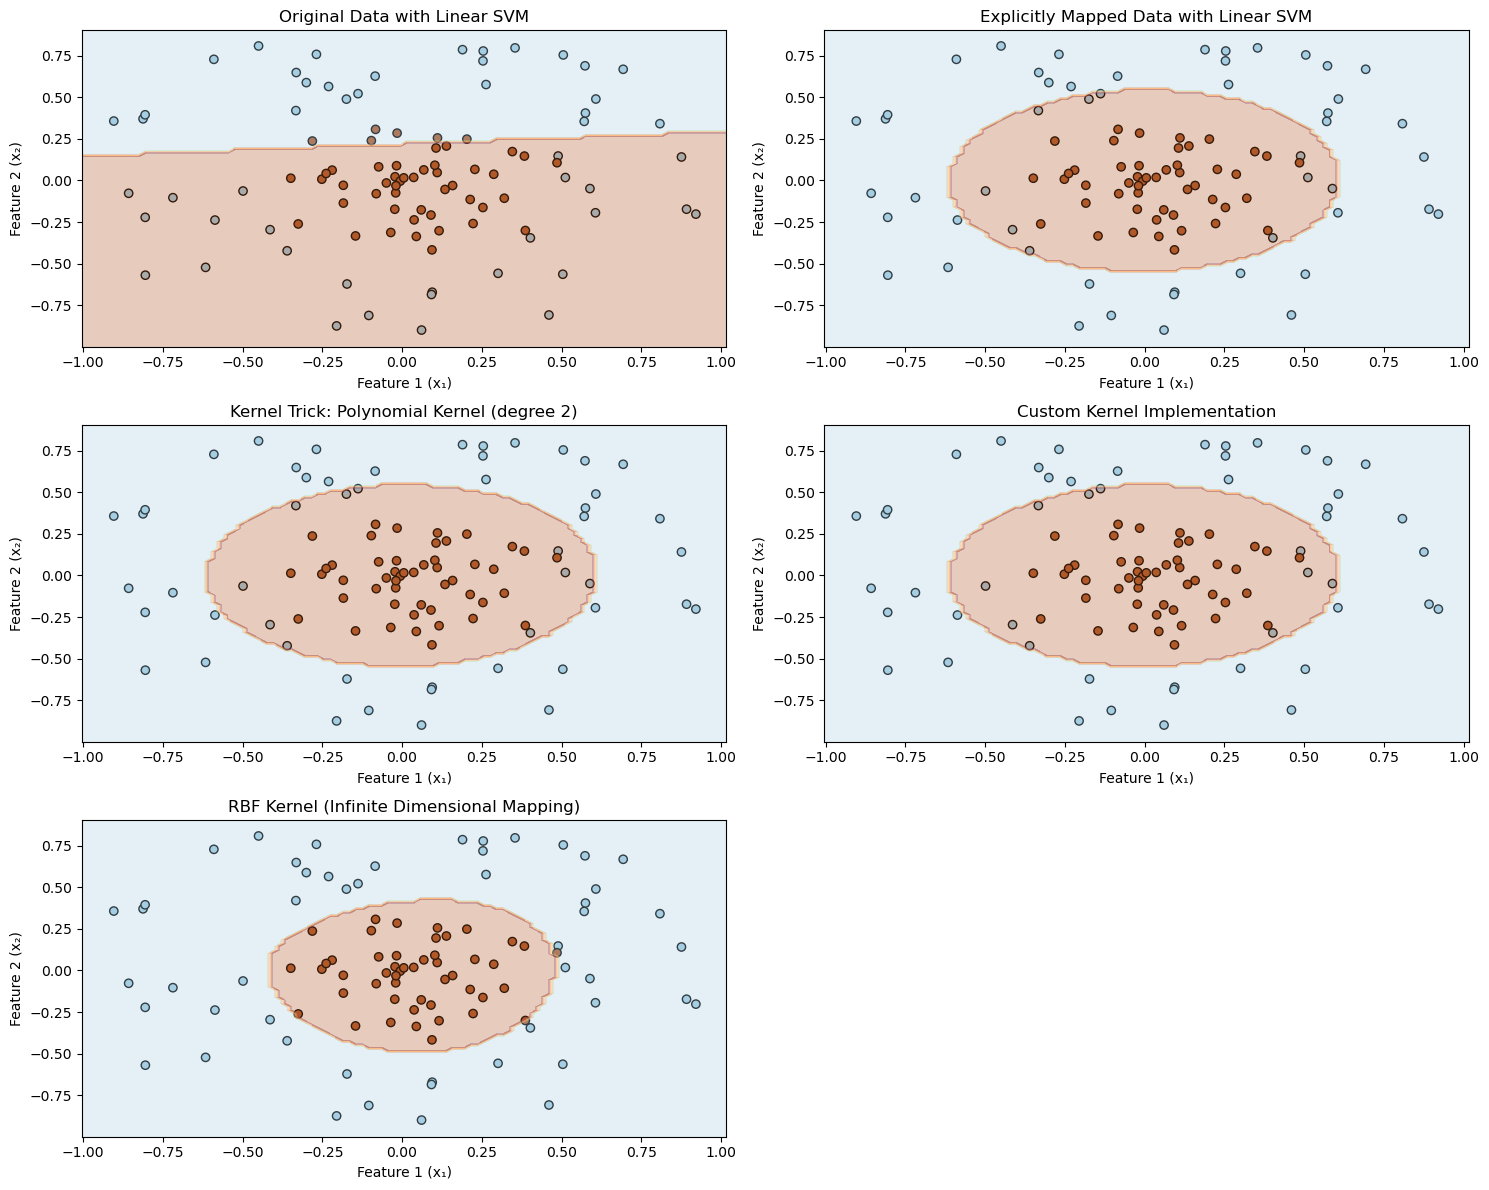

In [49]:


# Custom mapping function: φ(x₁, x₂) = (x₁², x₂², √2x₁x₂)
def mapping_function(X):
    """Transform data according to φ(x₁, x₂) = (x₁², x₂², √2x₁x₂)"""
    x1 = X[:, 0]  # feature 1
    x2 = X[:, 1]  # feature 2
    return np.column_stack((x1**2, x2**2, np.sqrt(2) * x1 * x2))

# Custom kernel function for this mapping
def custom_kernel(X1, X2):
    """Kernel corresponding to φ(x₁, x₂) = (x₁², x₂², √2x₁x₂)"""
    result = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x in enumerate(X1):
        for j, y in enumerate(X2):
            # K(x,y) = x₁²·y₁² + x₂²·y₂² + 2·x₁·x₂·y₁·y₂
            result[i, j] = x[0]**2 * y[0]**2 + x[1]**2 * y[1]**2 + 2 * x[0] * x[1] * y[0] * y[1]
    return result

# Create a mesh grid for visualization
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the dataset and different SVM approaches
plt.figure(figsize=(15, 12))

# 1. Original data with Linear SVM
plt.subplot(3, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Original Data with Linear SVM')

# Train a linear SVM on original data
linear_svm = svm.SVC(kernel='linear')
start_time = time.time()  #also calculate time 
linear_svm.fit(X, y)
linear_time = time.time() - start_time

# Predict on the mesh grid for visualization
Z = linear_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1 (x₁)')
plt.ylabel('Feature 2 (x₂)')

# 2. Explicitly mapped data with Linear SVM
plt.subplot(3, 2, 2)

# Apply the explicit mapping function to all data
X_mapped = mapping_function(X)

# Train a linear SVM on explicitly mapped data
explicit_svm = svm.SVC(kernel='linear')
start_time = time.time()
explicit_svm.fit(X_mapped, y)
explicit_time = time.time() - start_time

# Create a new mesh grid in the original space
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Apply mapping to grid points
grid_mapped = mapping_function(grid_points)

# Predict on mapped grid
Z_mapped = explicit_svm.predict(grid_mapped)
Z_mapped = Z_mapped.reshape(xx.shape)

# Plot original data and the decision boundary from the mapped space
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.contourf(xx, yy, Z_mapped, cmap=plt.cm.Paired, alpha=0.3)
plt.title('Explicitly Mapped Data with Linear SVM')
plt.xlabel('Feature 1 (x₁)')
plt.ylabel('Feature 2 (x₂)')

# 3. Original data with Polynomial Kernel (degree 2)
plt.subplot(3, 2, 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Kernel Trick: Polynomial Kernel (degree 2)')

# Train a polynomial kernel SVM
poly_svm = svm.SVC(kernel='poly', degree=2, gamma=1, coef0=0)
start_time = time.time()
poly_svm.fit(X, y)
poly_time = time.time() - start_time

# Predict on the mesh grid
Z_poly = poly_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_poly, cmap=plt.cm.Paired, alpha=0.3)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1 (x₁)')
plt.ylabel('Feature 2 (x₂)')

# 4. Custom kernel implementation
plt.subplot(3, 2, 4)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('Custom Kernel Implementation')

# Train SVM with the custom kernel
custom_svm = svm.SVC(kernel=custom_kernel)
start_time = time.time()
custom_svm.fit(X, y)
custom_time = time.time() - start_time

# Predict on the mesh grid
Z_custom = custom_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_custom = Z_custom.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_custom, cmap=plt.cm.Paired, alpha=0.3)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1 (x₁)')
plt.ylabel('Feature 2 (x₂)')

# 5. RBF Kernel 
plt.subplot(3, 2, 5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('RBF Kernel (Infinite Dimensional Mapping)')

# Train SVM with RBF kernel
rbf_svm = svm.SVC(kernel='rbf', gamma='scale')
start_time = time.time()
rbf_svm.fit(X, y)
rbf_time = time.time() - start_time

# Predict on the mesh grid
Z_rbf = rbf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z_rbf, cmap=plt.cm.Paired, alpha=0.3)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Feature 1 (x₁)')
plt.ylabel('Feature 2 (x₂)')


plt.tight_layout()

# Print results and timing comparison
print("\nModel accuracy comparison:")
print(f"Linear SVM on original data accuracy: {linear_svm.score(X, y):.4f} (Training time: {linear_time:.4f}s)")
print(f"Linear SVM on explicitly mapped data accuracy: {explicit_svm.score(X_mapped, y):.4f} (Training time: {explicit_time:.4f}s)")
print(f"SVM with polynomial kernel accuracy: {poly_svm.score(X, y):.4f} (Training time: {poly_time:.4f}s)")
print(f"SVM with custom kernel accuracy: {custom_svm.score(X, y):.4f} (Training time: {custom_time:.4f}s)")
print(f"SVM with RBF kernel accuracy: {rbf_svm.score(X, y):.4f} (Training time: {rbf_time:.4f}s)")


# Verify kernel equivalence for our custom kernel
print("\nVerifying kernel equivalence...")
# Sample a few points to verify
X_sample = X[:3]
Y_sample = X[3:6]

# 1. Direct computation in the mapped space
direct_result = np.zeros((len(X_sample), len(Y_sample)))
for i, x in enumerate(X_sample):
    x_mapped = mapping_function(x.reshape(1, -1))[0]  # Map x to higher dimension
    for j, y in enumerate(Y_sample):
        y_mapped = mapping_function(y.reshape(1, -1))[0]  # Map y to higher dimension
        # Calculate dot product in the mapped space
        direct_result[i, j] = np.dot(x_mapped, y_mapped)

# 2. Using the kernel function
kernel_result = np.zeros((len(X_sample), len(Y_sample)))
for i, x in enumerate(X_sample):
    for j, y in enumerate(Y_sample):
        # Calculate using the correct kernel formula
        kernel_result[i, j] = x[0]**2 * y[0]**2 + x[1]**2 * y[1]**2 + 2 * x[0] * x[1] * y[0] * y[1]

print("Direct calculation in mapped space:")
print(direct_result)
print("\nUsing correct kernel function:")
print(kernel_result)
print("\nDifference (should be very small):")
print(np.abs(direct_result - kernel_result))

plt.savefig('kernel_trick_with_rbf.png', dpi=300, bbox_inches='tight')
plt.show()

Again we are back to the Students dataset. We will apply now kernel SVM, using an RBF kernel, and tuning the hyperparameter gamma.



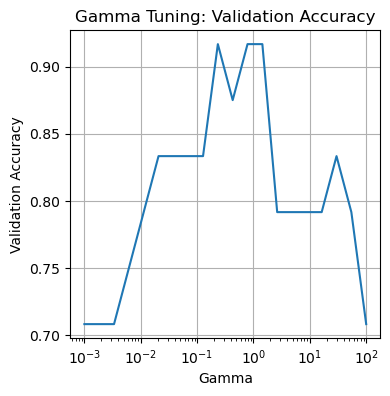


Best Gamma: 0.234
Best Validation Accuracy: 0.917

Final Test Set Results:
Accuracy: 0.875

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.94      0.88      0.91        17

    accuracy                           0.88        24
   macro avg       0.84      0.87      0.85        24
weighted avg       0.88      0.88      0.88        24



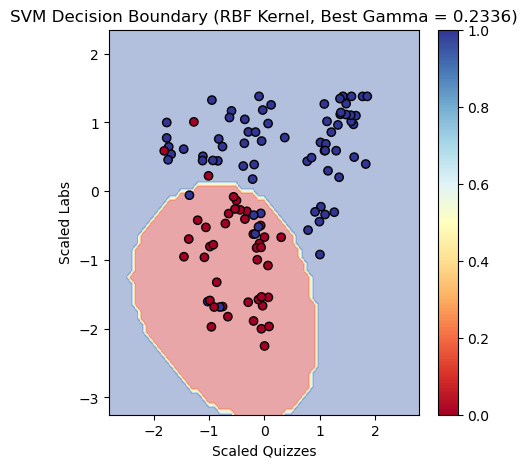

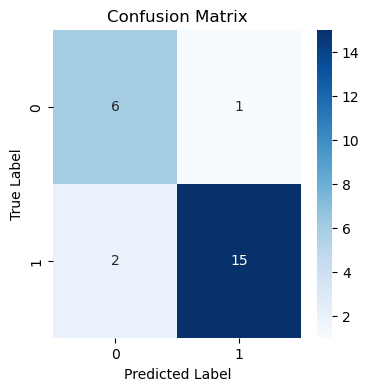

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create the dataset
data = {
    'Quizzes': [5.3, 5.5, 5.5, 5.0, 2.5, 3.0, 3.0, 3.1, 3.5, 3.5, 3.7, 4.0, 4.0, 4.0, 4.0, 5.7],
    'Labs': [5.3, 5.9, 5.29, 4.35, 5.5, 5.0, 4.0, 3.1, 4.5, 5.62, 5.0, 3.0, 4.0, 5.75, 4.44, 5.9],
    'Final': [4.818, 5.773, 4.464, 5.069, 4.164, 4.091, 3.727, 3.909, 3.518, 4.897, 5.209, 3.0, 3.091, 5.818, 4.069, 5.77]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Augmenting data by replicating and adding noise
np.random.seed(33)
augmented = []
for i in range(len(df)):
    row = df.iloc[i]
    for j in range(10):  # Create 10 variations of each record
        noise = np.random.normal(0, 0.2, 3)  # Add Gaussian noise
        new_row = row + noise
        new_row = new_row.clip(2, 6)  # Ensure values are within boundaries
        augmented.append(new_row)

# Create augmented DataFrame
df_aug = pd.DataFrame(augmented, columns=df.columns)

# Create binary classification (Pass/Fail) 
def pass_fail(grade):
    return 1 if grade >= 4.0 else 0  # 1 = Pass, 0 = Fail

# Add binary grades
df_aug['Pass'] = df_aug['Final'].apply(pass_fail)

# Prepare features and target
X = df_aug[['Quizzes', 'Labs']]
y = df_aug['Pass']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Gamma tuning
gamma_range = np.logspace(-3, 2, 20)  # Logarithmic scale from 10^-3 to 10^2
best_gamma = None
best_accuracy = 0

# Store results for plotting
gamma_accuracies = []

# Tune gamma
for gamma in gamma_range:
    # Create and train the SVM
    svm = SVC(kernel='rbf', gamma=gamma, random_state=42)
    svm.fit(X_train_scaled, y_train)
    
    # Validate
    y_val_pred = svm.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Store results
    gamma_accuracies.append((gamma, val_accuracy))
    
    # Update best gamma
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_gamma = gamma

# Plot gamma tuning results
gammas, accuracies = zip(*gamma_accuracies)
plt.figure(figsize=(4, 4))
plt.semilogx(gammas, accuracies)
plt.title('Gamma Tuning: Validation Accuracy')
plt.xlabel('Gamma')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()

print(f"\nBest Gamma: {round(best_gamma,3)}")
print(f"Best Validation Accuracy: {round(best_accuracy,3)}")

# Final model with best gamma
final_svm = SVC(kernel='rbf', gamma=best_gamma, random_state=42)
final_svm.fit(X_train_scaled, y_train)

# Test set evaluation
y_test_pred = final_svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\nFinal Test Set Results:")
print("Accuracy:", round(test_accuracy,3))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Visualization of decision boundary with best gamma
plt.figure(figsize=(5, 5))

# Create a mesh to plot in
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict for each point in the mesh
Z = final_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)

# Plot the training points
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], 
                      c=y_train, cmap=plt.cm.RdYlBu, 
                      edgecolor='black')

plt.title(f'SVM Decision Boundary (RBF Kernel, Best Gamma = {best_gamma:.4f})')
plt.xlabel('Scaled Quizzes')
plt.ylabel('Scaled Labs')
plt.colorbar(scatter)
plt.show()

# Confusion Matrix
plt.figure(figsize=(4, 4))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()